<a href="https://colab.research.google.com/github/UTExDrake/AI_Basic/blob/main/AI_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=14b6ae901d570d6ccd0f0b806f939f4399aa5218809530f60833ff23e20c33f5
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-3-156d3a40086b>:88: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 11, cmap= 'jet', anpha= 0.5)
<ipython-input-3-156d3a40086b>:89: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 11, cmap= 'jet', anpha= 0.5)
<ipython-input-3-156d3a40086b>:90: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 11, cmap= 'jet', anpha= 0.5)


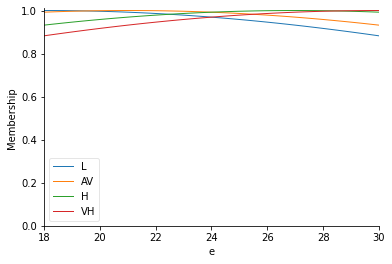

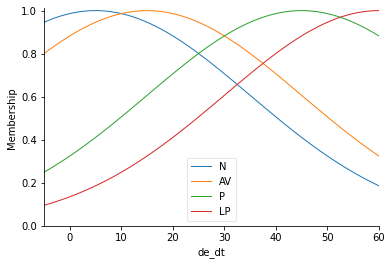

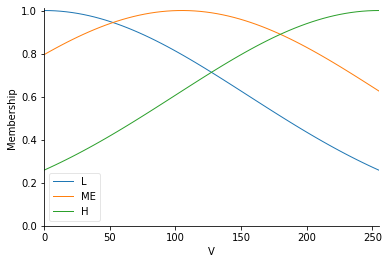

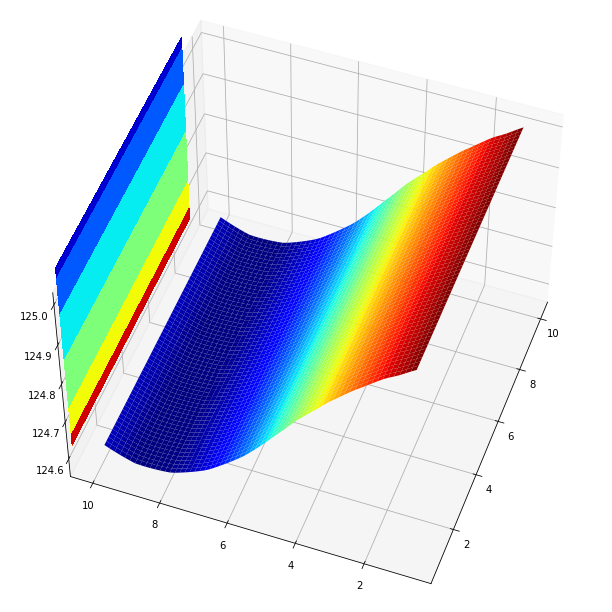

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(18,30,61)
universe1 = np.linspace(-5,60,61) 
universe2 = np.linspace(0,255,61) 

#Khai báo các biến vào-ra
e = ctrl.Antecedent(universe,'e')
de_dt = ctrl.Antecedent(universe1,'de_dt')
V = ctrl.Consequent(universe2,'V')
name1 = ['L', 'AV', 'H', 'VH']   
name2 = ['N', 'AV', 'P', 'LP']   
name3 = ['L', 'ME', 'H']   

e.automf(names = name1)
de_dt.automf(names = name2)
V.automf(names = name3)

e['L'] = fuzz.gaussmf(e.universe,18,24)
e['AV'] = fuzz.gaussmf(e.universe,21,24)
e['H'] = fuzz.gaussmf(e.universe,27,24)
e['VH'] = fuzz.gaussmf(e.universe,30,24)
e.view()

de_dt['N'] = fuzz.gaussmf(de_dt.universe,5,30)
de_dt['AV'] = fuzz.gaussmf(de_dt.universe,15,30)
de_dt['P'] = fuzz.gaussmf(de_dt.universe,45,30)
de_dt['LP'] = fuzz.gaussmf(de_dt.universe,60,30)
de_dt.view()

V['L'] = fuzz.gaussmf(V.universe,0,155)
V['ME'] = fuzz.gaussmf(V.universe,105,155)
V['H'] = fuzz.gaussmf(V.universe,255,155)
V.view()
#Rule
rule1 = ctrl.Rule(antecedent=((e['L']&de_dt['P'])|
                              (e['L']&de_dt['AV'])|
                              (e['L']&de_dt['N'])|
                              (e['AV']&de_dt['N'])|
                              (e['H']&de_dt['N']))
                              ,consequent=(V['L']))

rule2 = ctrl.Rule(antecedent=((e['L']&de_dt['LP'])|
                              (e['AV']&de_dt['P'])|
                              (e['AV']&de_dt['AV'])|
                              (e['H']&de_dt['P'])|
                              (e['H']&de_dt['AV'])|
                              (e['VH']&de_dt['N']))
                              ,consequent=(V['ME']))

rule3 = ctrl.Rule(antecedent=((e['AV']&de_dt['LP'])|
                              (e['H']&de_dt['LP'])|
                              (e['VH']&de_dt['LP'])|
                              (e['VH']&de_dt['P'])|
                              (e['VH']&de_dt['AV']))
                              ,consequent=(V['H']))


System  = ctrl.ControlSystem(rules = [rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)

#Khai báo dữ liệu
upSampled1 = np.linspace(1,10,61)
upSampled2 = np.linspace(1,10,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)
#Tính toán
for i in range(61):
  for j in range(61):
    sim.input['e']= x[i,j]
    sim.input['de_dt']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['V']
#Hiển Thị Kết Quả
fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'jet',linewidth= 0.4, antialiased= True)

#Chiếu 3 hình chiếu
cset = ax.contourf(x,y,z, zdir= 'z', offset= 11, cmap= 'jet', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 11, cmap= 'jet', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 11, cmap= 'jet', anpha= 0.5)
ax.view_init(50,200)